In [1]:
import rdkit

In [2]:
from rdkit import Chem

## drugs.smi 파일을 읽어서 분자들이 가지고 있는 탄소 개수의 히스토그램을 얻어라. 
----

In [59]:
#1. drugs.smi 파일을 읽어서 분자로 변환. 
molecules = [] # 빈 리스트 생성. 
with open("drugs.smi") as fp: 
    for l in fp: # fp에서 한줄씩 읽어들임. 
        mol = Chem.AddHs(Chem.MolFromSmiles(l.strip())) # newline character를 없애주기 위해서 strip 사용, MolFromSmiles 이용해서 읽어들임. 
        #mol2 = Chem.AddHs(mol) # SMILES에서 읽어들인 후, 수소를 붙여서 계산!!
        molecules.append(mol)
print("Number of molecules: ", len(molecules))
# molecules 라는 리스트 안에 Mol-type 변수들이 저장되어 있다!
# 히스토그램을 그리기 위해서는 num_carbon을 보관하는 리스트가 필요. 
# num_carbon_list 라고 정의 합시다. 
num_carbon_list = []
for m in molecules:
    num_carbon = 0
    for atom in m.GetAtoms():
        if atom.GetSymbol() == "C":
            num_carbon += 1 # 탄소를 찾을 때마다 1씩 증가!
    # 탄소의 개수가 num_carbon안에 들어 있음. 
    num_carbon_list.append(num_carbon)
print(num_carbon_list)
    

Number of molecules:  725
[21, 9, 10, 16, 28, 2, 11, 6, 20, 18, 14, 23, 4, 23, 20, 15, 11, 4, 13, 12, 13, 11, 12, 11, 17, 12, 10, 18, 9, 28, 17, 16, 10, 20, 13, 17, 19, 20, 6, 21, 22, 24, 22, 13, 7, 14, 18, 12, 11, 12, 19, 16, 8, 17, 24, 9, 18, 10, 7, 10, 16, 28, 10, 11, 20, 11, 21, 16, 21, 9, 28, 16, 26, 29, 6, 10, 15, 18, 22, 18, 17, 21, 12, 9, 26, 12, 10, 11, 19, 22, 8, 21, 29, 17, 12, 11, 26, 11, 17, 17, 25, 19, 22, 181, 20, 10, 20, 17, 27, 7, 28, 21, 21, 20, 23, 16, 6, 23, 24, 10, 18, 17, 17, 17, 17, 21, 13, 29, 15, 20, 19, 35, 9, 28, 26, 11, 14, 24, 23, 5, 29, 14, 23, 19, 19, 23, 24, 16, 27, 25, 10, 11, 23, 37, 6, 13, 16, 15, 19, 17, 17, 16, 17, 30, 17, 22, 16, 20, 17, 20, 13, 37, 11, 16, 22, 8, 4, 1, 20, 18, 10, 24, 25, 22, 14, 26, 29, 36, 17, 16, 20, 33, 23, 22, 19, 23, 17, 14, 19, 14, 14, 37, 10, 30, 17, 25, 25, 18, 10, 10, 21, 19, 15, 32, 21, 19, 15, 21, 21, 16, 25, 25, 21, 6, 22, 20, 6, 13, 7, 15, 12, 17, 40, 19, 10, 6, 9, 31, 14, 9, 21, 14, 12, 6, 19, 14, 26, 18, 12, 13, 30

* num_carbon_list 안의 숫자들을 이용해서 histogram을 생성하자!

  0 ~ 5: xx 개  
  6 ~ 10: yy 개  
  11 ~ 15:   
  16 ~ 20:  
  21 ~ 25:  
  26 ~ 30:  
  30 이상: 


In [60]:
count = [0, 0, 0, 0, 0, 0, 0]
for num in num_carbon_list:
    if 0 <= num <= 5:
        count[0] += 1
    elif 6 <= num <= 10:
        count[1] += 1
    elif 11 <= num <= 15:
        count[2] += 1
    elif 16 <= num <= 20:
        count[3] += 1
    elif 21 <= num <= 25:
        count[4] += 1
    elif 26 <= num <=30 :
        count[5] += 1
    else:
        count[6] += 1
print(count)

[33, 104, 147, 199, 151, 56, 35]


In [61]:
idx = 0
print(" Number of Carbons ")
for freq in count:
    print(f"{idx*5 + 1} <= N <= {(idx+1)*5} : {freq}")
    idx += 1

 Number of Carbons 
1 <= N <= 5 : 33
6 <= N <= 10 : 104
11 <= N <= 15 : 147
16 <= N <= 20 : 199
21 <= N <= 25 : 151
26 <= N <= 30 : 56
31 <= N <= 35 : 35


----
* 탄소 개수가 31개 이상인 것들만 뽑아서 분자들의 그림을 그려라. 
----

In [62]:
from rdkit.Chem import Draw
large_molecules = []
for m in molecules:
    n_c = 0 
    for atom in m.GetAtoms():
        if atom.GetSymbol() == "C":
            n_c += 1
    # condition based on the number of carbon
    if n_c <= 30:
        continue
    else:
        large_molecules.append(m) # 탄소 개수가 31개 이상인 분자들만 large_molecules에 저장 됨. 
print(len(large_molecules))

35


* large_molecules 안에 있는 분자들을 그려보자!

In [63]:
from rdkit.Chem import AllChem
for m in large_molecules:
    AllChem.Compute2DCoords(m)
 
img=Draw.MolsToGridImage(large_molecules, molsPerRow=3, subImgSize=(300,300))    

In [64]:
type(img)

PIL.PngImagePlugin.PngImageFile

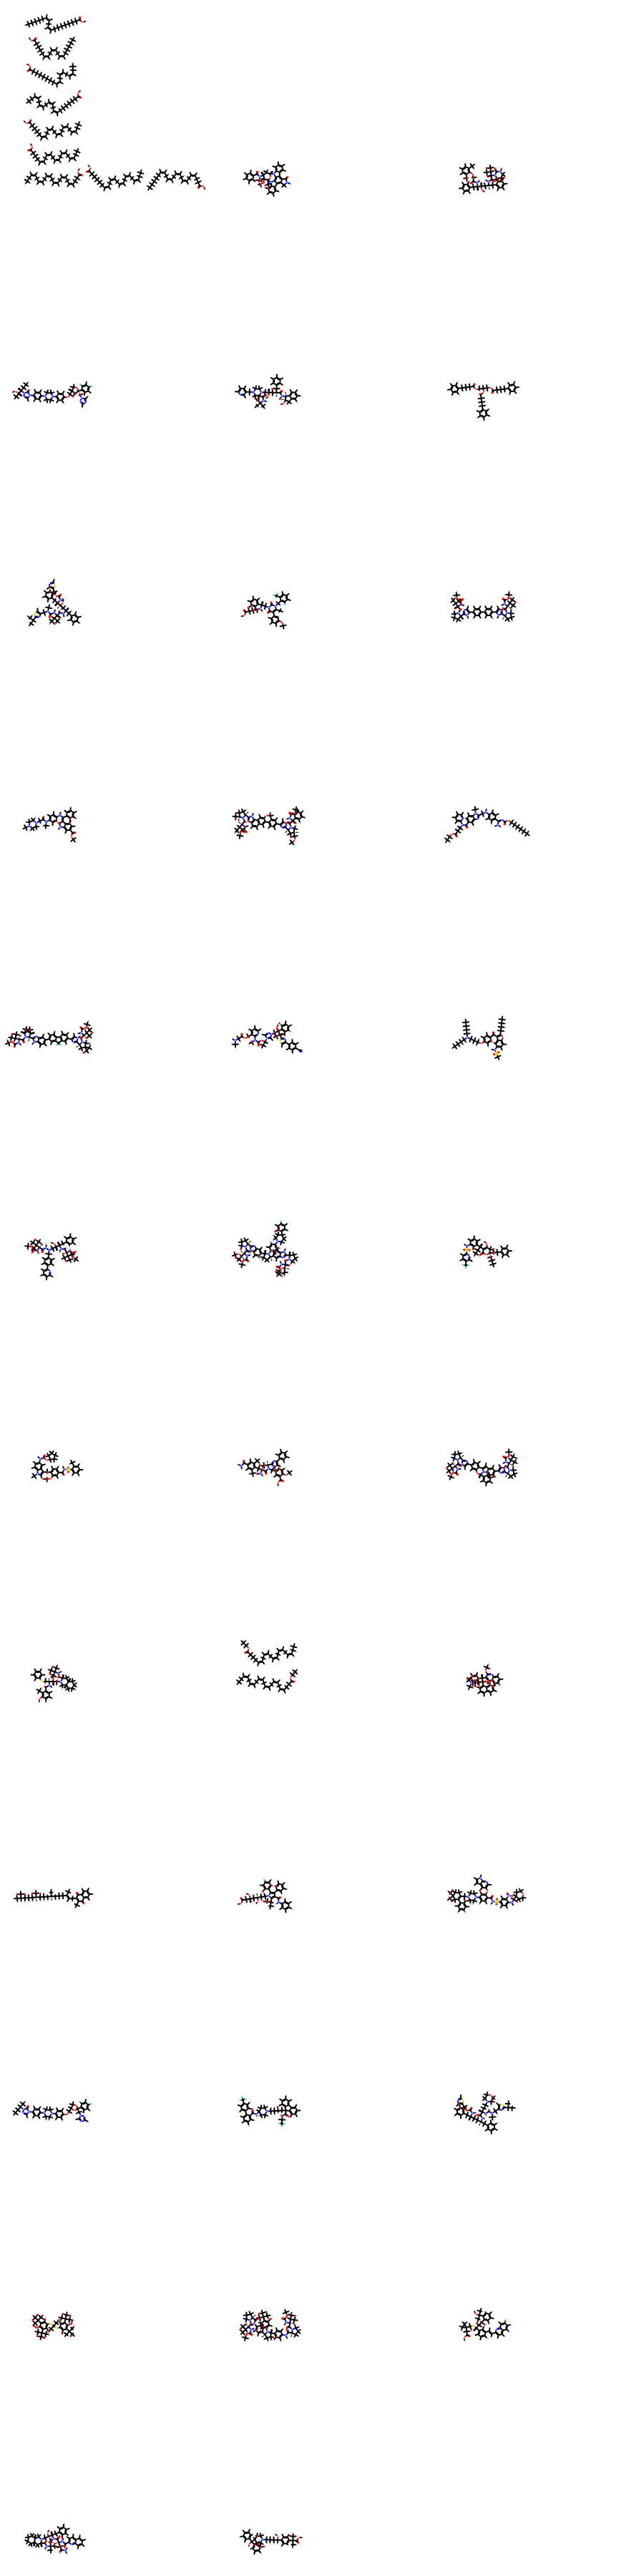

In [65]:
img

In [66]:
img.save("large_molecules.png")

* rdmoldescriptor 모듈을 사용해서 분자의 성질을 계산해보자!

In [67]:
from rdkit.Chem import rdMolDescriptors

In [70]:
for m in molecules:
    print(rdMolDescriptors.CalcNumHBA(m))

3
2
2
2
2
4
2
7
0
3
8
1
3
5
2
2
4
6
3
3
4
5
6
3
2
1
3
9
5
2
2
2
6
5
2
3
2
3
4
2
4
20
3
6
1
3
6
3
8
5
2
3
0
1
6
2
4
1
2
3
3
4
4
4
2
2
6
3
4
3
6
3
2
6
5
2
3
6
3
3
3
6
5
6
8
1
1
5
6
2
4
4
3
7
4
3
2
5
2
5
7
4
3
18
7
2
3
4
10
2
6
7
1
7
5
4
3
7
2
4
2
3
2
3
3
4
4
11
2
3
8
6
5
3
2
3
3
5
6
4
5
3
8
2
4
11
6
4
8
3
4
3
4
5
7
3
5
4
2
4
3
5
11
7
2
2
2
9
6
2
2
12
4
3
1
2
4
1
9
4
2
7
4
7
3
4
5
7
6
3
4
6
5
5
6
7
4
7
3
2
6
9
5
4
5
5
7
5
2
1
6
2
2
8
6
2
3
4
4
2
8
7
4
6
5
4
4
2
2
4
3
3
8
3
3
3
6
7
7
4
4
3
7
4
6
3
7
7
3
4
5
6
4
5
8
4
3
10
3
4
4
8
2
4
3
5
3
1
3
8
2
11
2
1
3
9
5
3
4
2
4
5
1
5
2
7
2
6
6
3
2
7
6
3
7
4
6
4
3
2
4
3
4
8
8
8
2
9
8
4
4
3
7
7
6
2
8
8
8
5
5
12
4
4
3
6
6
8
2
1
6
9
3
3
4
4
6
4
7
12
4
2
3
6
5
4
10
2
12
3
5
5
6
6
5
3
4
4
3
2
7
6
3
4
8
2
5
4
7
6
3
1
4
6
7
5
2
8
6
4
3
2
3
6
3
8
1
6
5
5
5
3
2
7
4
2
5
4
5
3
10
5
2
7
3
6
6
4
8
2
3
7
2
7
2
3
6
3
3
3
5
7
4
6
5
5
6
2
3
1
5
7
7
2
3
5
3
5
6
5
9
6
7
2
3
4
8
4
5
2
4
2
7
5
3
6
2
2
8
4
5
8
6
2
5
8
3
9
6
8
4
6
4
3
3
3
1
1
9
5
5
5
5
1
2
3
9
10
3
4
2
5
1

In [71]:
for m in molecules:
    print(rdMolDescriptors.CalcNumHBD(m))

1
2
1
0
2
2
0
1
0
0
4
1
2
4
1
2
3
4
2
1
2
2
2
0
0
1
2
2
1
0
0
0
5
1
1
0
0
0
0
1
1
14
0
1
1
0
4
1
4
2
1
0
0
0
1
1
2
1
1
1
0
1
2
2
2
1
1
2
0
3
0
1
0
1
4
2
2
1
0
1
2
2
1
2
1
1
2
2
2
0
3
3
1
2
2
2
1
2
1
0
3
1
1
9
1
2
1
1
0
1
2
3
0
2
0
2
2
2
1
3
1
1
0
0
1
0
1
2
1
0
1
1
4
1
0
1
3
0
0
3
1
1
3
0
1
3
2
2
1
2
3
2
2
4
4
2
3
2
0
2
2
2
2
4
1
0
0
3
3
0
1
1
4
1
1
1
0
3
4
1
0
2
0
2
1
6
1
4
1
1
0
0
3
0
1
0
1
3
0
0
1
4
2
0
0
1
1
2
1
1
0
0
0
2
2
0
2
3
2
1
1
3
1
5
1
1
4
0
1
2
3
2
4
0
3
2
0
2
2
3
1
2
1
2
0
3
4
1
1
4
2
3
3
1
2
0
0
4
1
1
1
2
1
3
1
0
4
1
1
4
1
4
0
0
1
2
3
2
1
1
1
0
1
1
1
0
0
1
2
1
1
1
2
0
2
0
2
1
1
3
2
1
1
1
1
4
1
1
6
0
2
0
1
1
2
2
1
3
1
4
2
2
3
2
2
1
2
1
0
2
1
5
0
3
1
3
2
2
2
1
0
2
2
2
2
2
2
0
4
1
2
1
2
1
2
0
1
3
1
1
1
2
0
3
2
1
2
3
1
3
2
1
2
2
2
3
0
1
2
1
2
0
1
2
1
2
1
2
2
2
1
1
1
4
1
2
3
2
1
2
4
2
1
1
1
4
0
2
2
0
0
4
1
2
0
2
2
1
1
2
1
2
2
2
2
3
2
1
2
0
1
1
2
0
1
1
3
3
2
1
3
5
5
1
1
0
1
4
1
1
0
1
3
0
1
4
1
0
3
3
1
1
2
1
4
3
0
3
1
2
1
2
3
2
0
2
1
1
1
1
1
1
1
1
2
1
2
0
1
0
1
1
0
0
1
2
2
0
2
1

* drugs.smi 파일안에 있는 분자들의 H-bond donor와 H-bond acceptor의 개수의 평균과 표준편차를 구해보자. 

In [72]:
hba_nums = [] # 수소결합 받개의 숫자를 저장. 
hbd_nums = [] # 수소결합 주개의 숫자를 저장. 
for m in molecules:
    hba_nums.append( rdMolDescriptors.CalcNumHBA(m) ) # 수소결합 받개 개수를 저장. 
    hbd_nums.append( rdMolDescriptors.CalcNumHBD(m) ) # 수소결합 주개의 개수를 저장. 

In [73]:
print(hba_nums)

[3, 2, 2, 2, 2, 4, 2, 7, 0, 3, 8, 1, 3, 5, 2, 2, 4, 6, 3, 3, 4, 5, 6, 3, 2, 1, 3, 9, 5, 2, 2, 2, 6, 5, 2, 3, 2, 3, 4, 2, 4, 20, 3, 6, 1, 3, 6, 3, 8, 5, 2, 3, 0, 1, 6, 2, 4, 1, 2, 3, 3, 4, 4, 4, 2, 2, 6, 3, 4, 3, 6, 3, 2, 6, 5, 2, 3, 6, 3, 3, 3, 6, 5, 6, 8, 1, 1, 5, 6, 2, 4, 4, 3, 7, 4, 3, 2, 5, 2, 5, 7, 4, 3, 18, 7, 2, 3, 4, 10, 2, 6, 7, 1, 7, 5, 4, 3, 7, 2, 4, 2, 3, 2, 3, 3, 4, 4, 11, 2, 3, 8, 6, 5, 3, 2, 3, 3, 5, 6, 4, 5, 3, 8, 2, 4, 11, 6, 4, 8, 3, 4, 3, 4, 5, 7, 3, 5, 4, 2, 4, 3, 5, 11, 7, 2, 2, 2, 9, 6, 2, 2, 12, 4, 3, 1, 2, 4, 1, 9, 4, 2, 7, 4, 7, 3, 4, 5, 7, 6, 3, 4, 6, 5, 5, 6, 7, 4, 7, 3, 2, 6, 9, 5, 4, 5, 5, 7, 5, 2, 1, 6, 2, 2, 8, 6, 2, 3, 4, 4, 2, 8, 7, 4, 6, 5, 4, 4, 2, 2, 4, 3, 3, 8, 3, 3, 3, 6, 7, 7, 4, 4, 3, 7, 4, 6, 3, 7, 7, 3, 4, 5, 6, 4, 5, 8, 4, 3, 10, 3, 4, 4, 8, 2, 4, 3, 5, 3, 1, 3, 8, 2, 11, 2, 1, 3, 9, 5, 3, 4, 2, 4, 5, 1, 5, 2, 7, 2, 6, 6, 3, 2, 7, 6, 3, 7, 4, 6, 4, 3, 2, 4, 3, 4, 8, 8, 8, 2, 9, 8, 4, 4, 3, 7, 7, 6, 2, 8, 8, 8, 5, 5, 12, 4, 4, 3, 6, 6, 8, 2, 1,

In [74]:
print(hbd_nums)

[1, 2, 1, 0, 2, 2, 0, 1, 0, 0, 4, 1, 2, 4, 1, 2, 3, 4, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 5, 1, 1, 0, 0, 0, 0, 1, 1, 14, 0, 1, 1, 0, 4, 1, 4, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 0, 3, 0, 1, 0, 1, 4, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 3, 3, 1, 2, 2, 2, 1, 2, 1, 0, 3, 1, 1, 9, 1, 2, 1, 1, 0, 1, 2, 3, 0, 2, 0, 2, 2, 2, 1, 3, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 4, 1, 0, 1, 3, 0, 0, 3, 1, 1, 3, 0, 1, 3, 2, 2, 1, 2, 3, 2, 2, 4, 4, 2, 3, 2, 0, 2, 2, 2, 2, 4, 1, 0, 0, 3, 3, 0, 1, 1, 4, 1, 1, 1, 0, 3, 4, 1, 0, 2, 0, 2, 1, 6, 1, 4, 1, 1, 0, 0, 3, 0, 1, 0, 1, 3, 0, 0, 1, 4, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 2, 3, 2, 1, 1, 3, 1, 5, 1, 1, 4, 0, 1, 2, 3, 2, 4, 0, 3, 2, 0, 2, 2, 3, 1, 2, 1, 2, 0, 3, 4, 1, 1, 4, 2, 3, 3, 1, 2, 0, 0, 4, 1, 1, 1, 2, 1, 3, 1, 0, 4, 1, 1, 4, 1, 4, 0, 0, 1, 2, 3, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 3, 2, 1, 1, 1, 1, 4, 1, 1, 6, 0, 2, 0, 1, 1, 2, 2, 1, 3, 1, 4, 2, 2, 3, 2, 2, 1, 2, 1, 0, 2, 1, 5, 0,

In [75]:
def average(num_list):
    # input은 num_list
    # output은 average
    avg = sum(num_list) / len(num_list)
    return avg

In [76]:
average(hba_nums)

4.51448275862069

In [77]:
average(hbd_nums)

1.5655172413793104

In [78]:
import math
def average_and_std(num_list):
    # input은 숫자의 리스트
    # output은 평균, 표준편차. 
    avg = sum(num_list) / len(num_list)
    std = 0
    for n in num_list:
        std = std + (n-avg)**2 # \sigma (x - x_bar)**2
    std = std / (len(num_list) - 1) # \sigma (x - x_bar)**2 / (n-1)
    std = math.sqrt(std) # root 씌움. 
    return avg, std


In [79]:
hbd_avg, hbd_std = average_and_std(hbd_nums)

In [80]:
hba_avg, hba_std = average_and_std(hba_nums)

In [81]:
print(f"Average and STD of number of H-bond donor    : {hbd_avg:.4f} {hbd_std:.4f}")
print(f"Average and STD of number of H-bond acceptor : {hba_avg:.4f} {hba_std:.4f}")

Average and STD of number of H-bond donor    : 1.5655 1.3140
Average and STD of number of H-bond acceptor : 4.5145 2.3916


In [107]:
def has_aromatic(m):
    double=0
    for bond2 in m.GetBonds():
        if bond2.GetBondType() == rdkit.Chem.BondType.AROMATIC:
            double += 1
        else:
            continue
    return double

In [105]:
has_double(molecules[6])

3

In [90]:
m = molecules[0]

In [92]:
bond = m.GetBonds()[0]

In [97]:
bond.GetBondType() == rdkit.Chem.rdchem.BondType.SINGLE

True

In [98]:
bond.GetBondType() == "SINGLE"

False

In [99]:
print(bond.GetBondType())

SINGLE


In [100]:
str(bond.GetBondType())

'SINGLE'

In [111]:
has_aromatic(molecules[10])

12